<a href="https://colab.research.google.com/github/francji1/01ZLMA/blob/main/R/01ZLMA_ex02_hw_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01ZLMA - Exercise 02 - Solution of HW
Exercise 02 of the course 01ZLMA. 



#  Theory recap from Lectures 01-03

Let's consider (m1):
  1. realization $(y_i,\ldots,y_n)$ of $iid$ random variables $Y_1,\ldots,Y_n$ with probability density function $f(y;\theta;\phi)$ from an exponential family of probability distributions
  $$f(y;\theta;\phi) = exp\left(\frac{y \theta - b(\theta)}{a(\phi)} - c(y,\phi)\right),$$
  where conditions of regularity are fulfilled (one dimensional case, i.e. $y_i,\theta_i \in R, a(\phi) >0, \phi >0)$.
  2. Regression matrix $X$ and vector of unknown parameters $\beta$, linear predictor $η = X \beta$
  3. A link function $g(x)$
  $$\eta_i = g(\mu_i) = x_i^T \beta, \ \text{where} \ \mu_i = E[Y_i] \ \ i = 1,\ldots,n$$

The dispersion $a(\phi)$ is typically known. If not, we take it as nuisance parameter.

Link function satisfying $g(\mu_i) = \theta_i$ is called canonical.

For $b(\theta) \in C^2$ we showed:
$$E[Y] = b'(\theta) $$
$$V[Y] = a(\phi) b''(\theta) $$
and defined variance function $v(\mu) = \frac{\partial \mu}{\partial \theta}$, i.e. $V[Y] = a(\phi) v(\mu)$

Relations:

$$
\beta \xrightarrow[]{\eta_i = x_i^T\beta} \eta
\xrightarrow[]{\mu_i = g^{-1}(\eta_i)}  \mu
\xrightarrow[]{\theta_i = (b')^{-1}(\mu_i)}  \theta
$$ 

Inverse relatiions
$$
\eta_i 
\xleftarrow[]{}  \mu
\xleftarrow[]{}  \theta
$$ 


## Likelihood, Score function, Information matrix 
(Under conditions M1,M2 and regularity conditions R1-R3 from the lecture)

* Likelihood function:
$$L_n(\Theta) = L_n(\Theta|Y) = \prod_{i=1}^{n} f(y_i|\Theta) $$
* log-likelihood function:
$$l_n(\Theta) = l_n(\Theta|Y) = \sum_{i=1}^{n} \text{ln} f(y_i|\Theta) $$
* Score function:  ($R^m \rightarrow R^m$):
$$U = U(\Theta|Y_i) = \frac{\partial \text{ln} f(y_i|\Theta)}{\partial \Theta} $$
* Score vector (statistics):
$$U_{n} = U_{n}(\Theta|Y) = \sum_{i=1}^{n} U(\Theta|Y_i)= \sum_{i=1}^{n} \frac{\partial l_i(\Theta|y_i)}{\partial \Theta} $$
* Fisher Information matrix
$$ I_n (\Theta) = E_{\theta}[U_nU_n^T]$$
with elements
$$ I_{n,j,k} = E_{\theta}[\frac{\partial l}{\partial \theta_j}\frac{\partial l}{\partial \theta_k}] = -E_{\theta}[\frac{\partial^2 l}{\theta_j \theta_k}]$$




In [3]:
library(tidyverse)
library(lubridate)
library(MASS)
library(rmarkdown)

#install.packages("plotly")
#library(plotly)

#install.packages("car")
#library(car)
#install.packages("GGally")
#library(GGally)

#For sure: set dplyr functions
select    <- dplyr::select;
rename    <- dplyr::rename;
mutate    <- dplyr::mutate; 
summarize <- dplyr::summarize;
arrange   <- dplyr::arrange;
slice     <- dplyr::slice;
filter    <- dplyr::filter;
recode    <- dplyr::recode

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.2.0     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0
✔ purrr   1.0.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’



Attaching package: ‘plotly’


The following object is masked from ‘package:MASS’:

    select


The following object 

In [4]:
install.packages("GLMsData")
library(GLMsData)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
install.packages("dobson")
library(dobson)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dobson’


The following object is masked from ‘package:MASS’:

    housing




**Exercise 01**

Estimate parameters $\beta$ by MLE for M1.

log-likelihood function is
$$ l(\theta, \phi, y) = \sum_{i=1}^n \frac{y_i \theta_i - b(\theta_i)}{a_i(\phi)} + \sum_{i=1}^n c(y_i,\phi) $$
and we want to estimate $\beta = (\beta_1, \ldots, \beta_n)^T$, i.e.
$$ \hat{\beta} = argmax_{\beta}(l(\theta,\phi,y))$$
$$\Rightarrow$$
$$ U_n = \sum_{i=1}^n \frac{y_i - \mu_i}{V[Y_i]  g'(\mu_i)} x_i = X^T M^{-1}(y-\mu) = 0$$
where $M = diag(V[Y_i]g'(\mu_i))$
$$\Rightarrow$$
$$ U_n(\beta) = X^T W(\beta)^{-1}Z(\beta),$$\
where $W(\beta) = diag(V[Y_i]g'(\mu_i)^2)$ and $Z(\beta) = diag(g'(\mu_i)(y-\mu))$


It can be shown 
$$I_n = X^T W(\beta)^{-1} X $$

## Newton Rapson

For MLE using the score function, the estimating equation is
$$\hat{\beta}^{(r+1)} = \hat{\beta}^{(r)} + \frac{U(\hat{\beta}^{(r)})}{\frac{d U(\hat{\beta}^{(r)})}{d \theta}}$$

Question: What are advantages and disadvantages of this method.

## Fisher Scoring

$$\hat{\beta}^{(r+1)} =  \hat{\beta}^{(r)} + \frac{U(\hat{\beta}^{(r)})}{E [\frac{d U(\hat{\beta}^{(r)})}{d \theta} ]} = \hat{\beta}^{(r)} + \frac{U(\hat{\beta}^{(r)})}{I(\hat{\beta}^{(r)})}$$

Question: What are advantages and disadvantages of this method.

# IWLS

$$I(\hat{\beta}^{(r)}) \hat{\beta}^{(r+1)}  =  I(\hat{\beta}^{(r)}) \hat{\beta}^{(r)} + U(\hat{\beta}^{(r)})$$
$$ \Rightarrow$$
$$(X^T W(\hat{\beta}^{(r)})^{-1} X) \hat{\beta}^{(r+1)}  = X^T W(\hat{\beta}^{(r)})^{-1} Z(\hat{\beta}^{(r)})  $$
$$ \Rightarrow$$
$$  \hat{\beta}^{(r+1)}  =  (X^T W(\hat{\beta}^{(r)})^{-1} X)^{-1} X^T W(\hat{\beta}^{(r)})^{-1} Z(\hat{\beta}^{(r)})  $$ 
where $Z(\beta) = X \beta + diag(g'(\mu_i))(y-\mu)$

## Poisson regression example (Dobson 4.4)



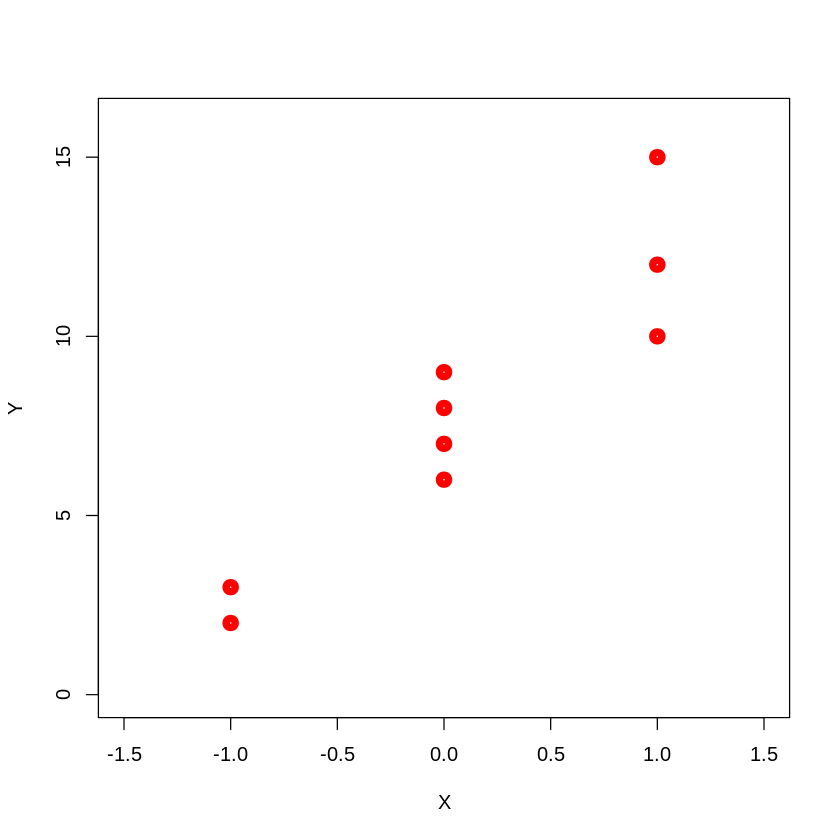

In [7]:
# Generate and plot the Dataset

X <- c(-1,-1,0,0,0,0,1,1,1)
Y <- c(2,3,6,7,8,9,10,12,15)
n <- length(X)

df1 <- data.frame(X=X, Y=Y)
plot(X,Y,xlim = c(-1.5, 1.5), ylim = c(0, 16), col="red",lwd=6)

In [8]:
#plot_ly(df1, x=~ X, y=~Y, mode = "markers") %>%
# layout(title = "Scatter Plot by plotly") %>%
# embed_notebook()

Let us assume that the response $Y_i$ are Poisson random variables and model the relation ship between $Y_i$ and $x_i$ by the straight line, i.e.
$$E[Y_i] = \mu_i = \beta_1 + \beta_2 x_i = x_i^T \beta \  \Rightarrow \ q(\mu_i) = \mu_i =  x_i^T \beta  = \eta_i$$
Therefore $\frac{1}{g'(\mu_i)} = 1 \ \Rightarrow \ w_{ii} = \frac{1}{V[Y]} = \frac{1}{\beta_1 + \beta_2x_i}$ 

In [10]:
# Function to calcualate weights
calc_W <- function(X,beta){
  n = length(X[,1])
  w = diag(c(1/(X%*%beta)),n,n)
}

In [11]:
# Initial values
X=cbind(rep(1,length(n)),c(-1,-1,0,0,0,0,1,1,1))
beta_0 = c(2,1)
z = Y

In [12]:
# Compute Weight matrix
W <- calc_W(X,beta_0)

In [13]:
# Step from beta_0 to beta_1
beta_1 = solve(t(X)%*%W%*%X, t(X)%*%W%*%z)
beta_1

7.452381
4.928571


In [14]:
# variance-covariance matrix for estamtes beta_1
W = calc_W(X,beta_1)
solve((t(X)%*%W%*%X))

0.7818552,0.4156844
0.4156844,1.1874117


# Your turn:
1. Write function to calculate IWLS for example 1 with following parameters
 * maximal number of iteration
 * accuracy
 * initial estimation
2. Try different initialization (ols, random, lecture, ...). Plot convergence of parameters $\beta_i$ depends on initial estimation.


In [15]:
# Set parameters

maxiter <- 10        # maximal number of iteration
epsilon <- 10^(-15)   # accuracy
beta_init <- c(7,5)
beta_all <- rbind(beta_init)

In [16]:
IWLS_1 <- function(X,Y,beta_init, maxiter, epsilon){
  # Fisher-scoring algorithm
  i <- 1     # first iteration
  convergence <- FALSE
  beta_i <- beta_init
  while (convergence == FALSE & i <= maxiter)
  {
  ## Place for your code ###
  W = calc_W(X,beta_i)
  beta_i = solve(t(X)%*%W%*%X, t(X)%*%W%*%Y)
  print(i)
  diff   <- max(t(beta_i) - beta_all[i,])
  print(paste("beta_i:",beta_i))
  print(paste("diff:",diff))
  if (any(diff>=epsilon)){
     i <- i+1
     beta_all <- rbind(beta_all,t(beta_i))
  }
  else
     convergence <- TRUE
  }
  return(data.frame(beta_all))
}

* Change the function to be able to change maxiter and epsilon in the input.
* plot betas and its evolution

In [17]:
betas <- IWLS_1(X,Y,beta_init, maxiter, epsilon)
names(betas) <-c("beta0","beta1")
betas

[1] 1
[1] "beta_i: 7.45138888888889" "beta_i: 4.9375"          
[1] "diff: 0.451388888888892"
[1] 2
[1] "beta_i: 7.45163180670753" "beta_i: 4.93531373963216"
[1] "diff: 0.000242917818642496"
[1] 3
[1] "beta_i: 7.45163328051158" "beta_i: 4.93530047539575"
[1] "diff: 1.47380404857955e-06"
[1] 4
[1] "beta_i: 7.45163328945272" "beta_i: 4.93530039492556"
[1] "diff: 8.94113583171929e-09"
[1] 5
[1] "beta_i: 7.45163328950696" "beta_i: 4.93530039443737"
[1] "diff: 5.42419442695063e-11"
[1] 6
[1] "beta_i: 7.45163328950728" "beta_i: 4.9353003944344" 
[1] "diff: 3.24185123190546e-13"
[1] 7
[1] "beta_i: 7.45163328950729" "beta_i: 4.93530039443439"
[1] "diff: 5.32907051820075e-15"
[1] 8
[1] "beta_i: 7.45163328950729" "beta_i: 4.93530039443439"
[1] "diff: 8.88178419700125e-16"


,beta0,beta1
,<dbl>,<dbl>
beta_init,7.000000,5.000000
X,7.451389,4.937500
X.1,7.451632,4.935314
X.2,7.451633,4.935300
X.3,7.451633,4.935300
X.4,7.451633,4.935300
X.5,7.451633,4.935300
X.6,7.451633,4.935300


In [18]:
#############################################
## By default R function

model <- glm(Y~-1+X, family=poisson(link = "identity"))

summary(model) 
#beta_hat <- coefficients(model)  
#beta_hat


Call:
glm(formula = Y ~ -1 + X, family = poisson(link = "identity"))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7019  -0.3377  -0.1105   0.2958   0.7184  

Coefficients:
   Estimate Std. Error z value Pr(>|z|)    
X1   7.4516     0.8841   8.428  < 2e-16 ***
X2   4.9353     1.0892   4.531 5.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance:    Inf  on 9  degrees of freedom
Residual deviance: 1.8947  on 7  degrees of freedom
AIC: 40.008

Number of Fisher Scoring iterations: 3


# HW 02


An example 4.1. from the book "An Introduction to Generalized Linear Models" by Dobson. The data in Table 4.5 show the numbers of cases of AIDS in Australia by date of diagnosis for successive 3-months periods from 1984 to 1988.

* Plot the number of cases $y_i$ against time period (i = 1 ... 20).
* Use the Poisson distribution with parameter $\lambda_i = i^{\theta}$ or equivalently $log(\lambda_i) = \theta log(i)$. Plot $log(y_i)$ against $log(i)$ to examne this model.
* Fit a generalized linear model to these data using the Poisson distribution and the log-link function, ie 
$$ g(\lambda_i) = log(\lambda_i) = \beta_1 + \beta_2 x_i,$$
where $x_i = log_i$.

In [32]:
data(aids)
summary(aids)
aids

      year         quarter         cases       
 Min.   :1984   Min.   :1.00   Min.   :  1.00  
 1st Qu.:1985   1st Qu.:1.75   1st Qu.: 29.25  
 Median :1986   Median :2.50   Median : 57.00  
 Mean   :1986   Mean   :2.50   Mean   : 65.55  
 3rd Qu.:1987   3rd Qu.:3.25   3rd Qu.: 98.75  
 Max.   :1988   Max.   :4.00   Max.   :159.00  

year,quarter,cases
<dbl>,<dbl>,<dbl>
1984,1,1
1984,2,6
1984,3,16
1984,4,23
1985,1,27
1985,2,39
1985,3,31
1985,4,30
1986,1,43


In [33]:
AIDS <- aids %>%
  mutate(season = paste0(year,":Q",quarter),
         time = yq(season))

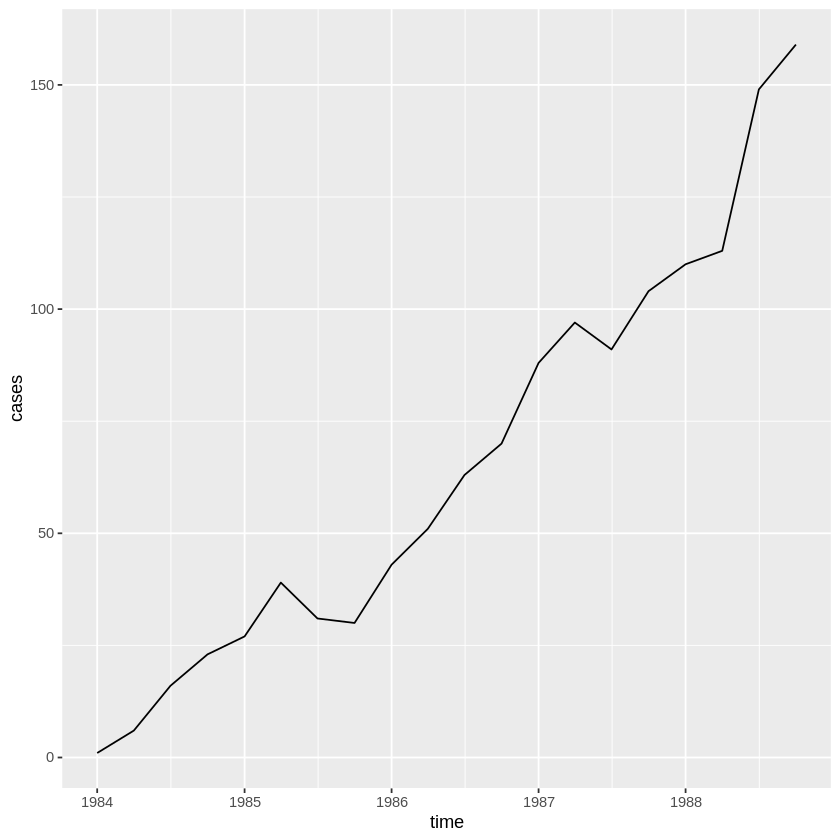

In [34]:
p <- ggplot(AIDS, aes(x=time, y=cases)) +
  geom_line() #+ 
  #scale_x_date(date_labels = "%Y-%B")+
  #theme(axis.text.x=element_text(angle=60, hjust=1)) +
  #scale_x_date(breaks = AIDS$time)
p

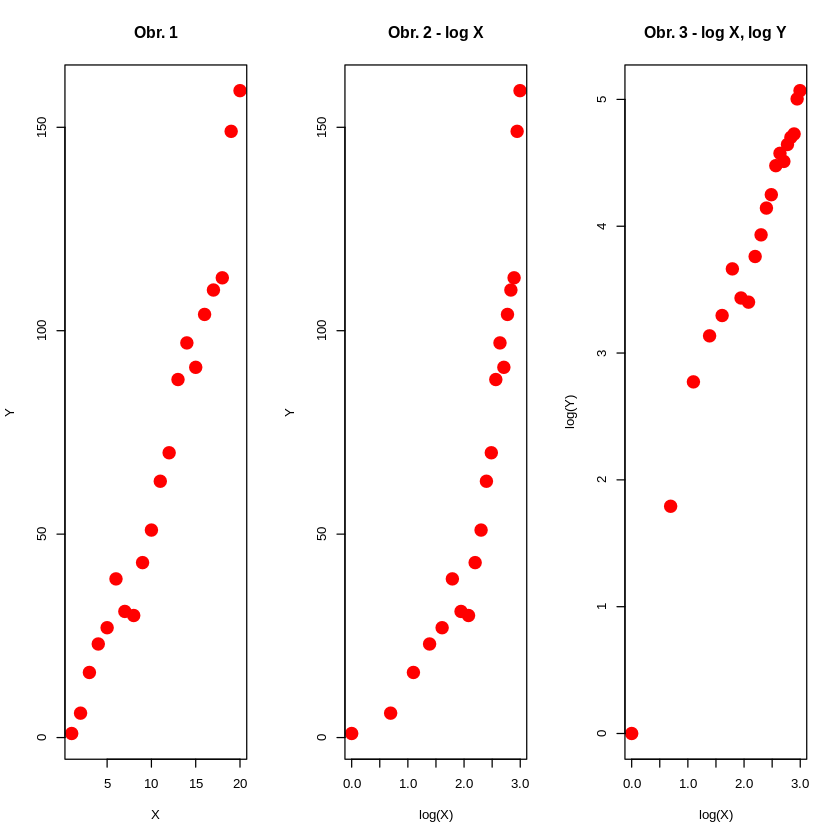

In [35]:

X <- seq(1,20,1)
Y <- aids$cases
#Y <- c(1, 6, 16, 23, 27, 39, 31, 30, 43, 51, 63, 70, 88, 97, 91, 104, 110, 113, 149, 159)

par(mfrow=c(1,3))
plot(X,Y, col="red", lwd=6, main="Obr. 1")
plot(log(X),Y, col="red",lwd=6, main="Obr. 2 - log X")
plot(log(X),log(Y),col="red",lwd=6, main="Obr. 3 - log X, log Y")


In [36]:
#install.packages("plotly")
#library(plotly)
#X <- seq(1,20,1)
#Y <- c(1, 6, 16, 23, 27, 39, 31, 30, 43, 51, 63, 70, 88, 97, 91, 104, 110, 113, 149, 159)
#
#df2 <- data.frame(x = c(X,log(X),log(X)),
#                  y = c(Y,Y,log(Y)),
#                  group = rep(c("X vs. Y","log(X) vs. Y","log(X) vs. log(Y)"), each = 20))
#
#pl <- plot_ly(df2, x=~ x, y=~y, mode = "markers",split = ~group) %>%
#  layout(title = "Scatter Plot by plotly")
#embed_notebook(pl)

### Write function to estimate coefficients by IWLS 

Let us assume that the response $Y_i$ are Poisson random variables and model the relation ship between $log(Y_i)$ and $x_i$ as a straight line.
$$log(E[Y_i]) = log(\mu_i) = \beta_1 + \beta_2 x_i = x_i^T \beta \  \Rightarrow \ q(\mu_i) = log(\mu_i) =  x_i^T \beta  = \eta_i$$
Therefore $\frac{1}{g'(\mu_i)} = \mu_i \ \Rightarrow \ w_{ii} = \frac{1}{V[Y_i]g'(\mu_i)^2} = \mu_i = e^{\beta_1 + \beta_2x_i}$ 

$Z(\beta) = diag(g'(\mu_i)(y-\mu))=diag(\frac{1}{e^{\beta_1 + \beta_2x_i}}(y_i - e^{\beta_1 + \beta_2x_i})) = diag(\frac{y_i}{e^{\beta_1 + \beta_2x_i}} - 1)$

In [37]:
X = log(X)
Y = AIDS$cases
n = length(X)
X=cbind(rep(1,length(n)),X)

In [38]:
# Initial estimation
beta_init <- t(t(c(2, 3)))
beta_init


2
3


In [39]:
calc_W2 <- function(X,beta){
  n = length(X[,1])
  w = diag(c(exp(X%*%beta)),n,n)
  #w = diag(c(exp(beta[1])*(1:20)^beta[2]),n,n)
}

In [40]:
w =calc_W2(X,beta_init)
Z = diag(c(Y/exp(X%*%beta_init)-1),n,n)

In [41]:
IWLS_2 <- function(X,Y,beta_init, maxiter, epsilon){
  # Fisher-scoring algorithm
  i <- 1     # first iteration
  convergence <- FALSE
  beta_i <- beta_init
  while (convergence == FALSE & i <= maxiter)
  {
  Z = X%*%beta_i + c(Y/exp(X%*%beta_i)-1)
  W = calc_W2(X,beta_i)
  beta_i = solve(t(X)%*%W%*%X, t(X)%*%W%*%Z)
  print(i)
  diff   <- max(t(beta_i) - beta_all[i,])
  print(paste("beta_i:",beta_i))
  print(paste("diff:",diff))
  if (any(abs(diff)>=epsilon)){
     i <- i+1
     beta_all <- rbind(beta_all,t(beta_i))
  }
  else
     convergence <- TRUE
  }
  return(data.frame(beta_all))
}

In [42]:
betas <- IWLS_2(X,Y,beta_init, maxiter, epsilon)
names(betas) <-c("beta0","beta1")
betas

[1] 1
[1] "beta_i: 1.03604756897916" "beta_i: 2.98843773957678"
[1] "diff: -2.01156226042322"
[1] 2
[1] "beta_i: 0.132768846931244" "beta_i: 2.95744144885365" 
[1] "diff: -0.0309962907231212"
[1] 3
[1] "beta_i: -0.613408844482413" "beta_i: 2.87629525441996"  
[1] "diff: -0.0811461944336984"
[1] 4
[1] "beta_i: -0.985680662415119" "beta_i: 2.67699137338052"  
[1] "diff: -0.199303881039439"
[1] 5
[1] "beta_i: -0.654511603586013" "beta_i: 2.26322800230667"  
[1] "diff: 0.331169058829106"
[1] 6
[1] "beta_i: 0.31225602265386" "beta_i: 1.69752972700607"
[1] "diff: 0.966767626239873"
[1] 7
[1] "beta_i: 0.912614235219566" "beta_i: 1.3763022828607"  
[1] "diff: 0.600358212565706"
[1] 8
[1] "beta_i: 0.994020293705745" "beta_i: 1.32784840139734" 
[1] "diff: 0.081406058486179"
[1] 9
[1] "beta_i: 0.99599663253292" "beta_i: 1.32661056550726"
[1] "diff: 0.00197633882717563"
[1] 10
[1] "beta_i: 0.995998048471111" "beta_i: 1.32660967239952" 
[1] "diff: 1.41593819080743e-06"


,beta0,beta1
,<dbl>,<dbl>
beta_init,7.0000000,5.000000
X,1.0360476,2.988438
X.1,0.1327688,2.957441
X.2,-0.6134088,2.876295
X.3,-0.9856807,2.676991
X.4,-0.6545116,2.263228
X.5,0.3122560,1.697530
X.6,0.9126142,1.376302
X.7,0.9940203,1.327848


In [43]:
model = glm(Y ~ X, family = poisson(link = "log"))
summary(model)


Call:
glm(formula = Y ~ X, family = poisson(link = "log"))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0568  -0.8302  -0.3072   0.9279   1.7310  

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.99600    0.16971   5.869 4.39e-09 ***
X                 NA         NA      NA       NA    
XX           1.32661    0.06463  20.525  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 677.264  on 19  degrees of freedom
Residual deviance:  21.755  on 18  degrees of freedom
AIC: 138.05

Number of Fisher Scoring iterations: 4


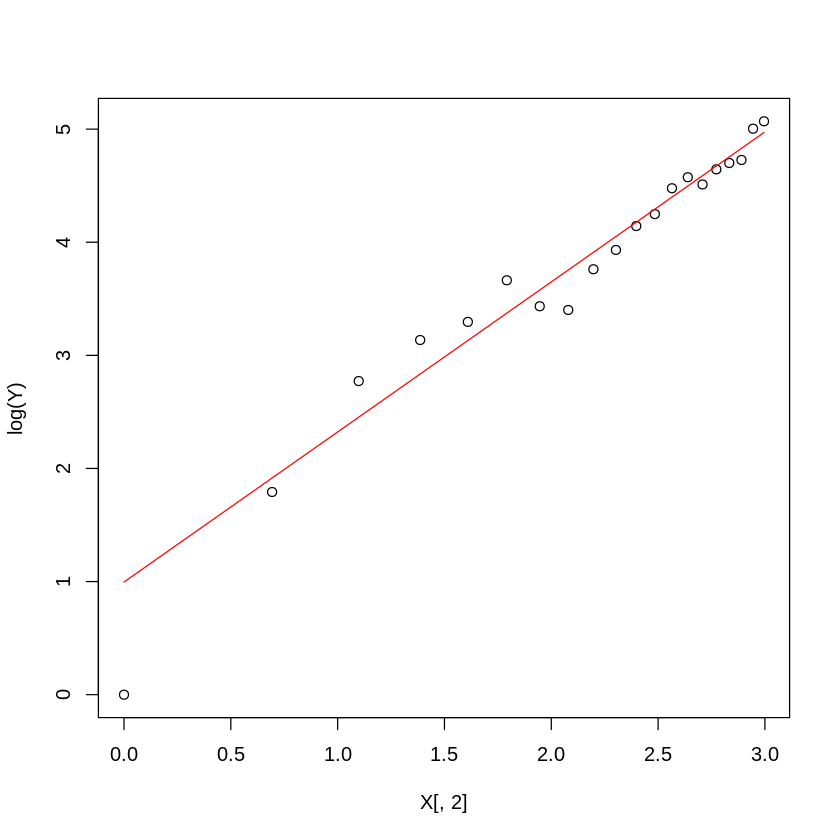

In [44]:
plot(X[,2],log(Y))
lines(X[,2], log(model$fitted.values), col = 'red', type = 'l')

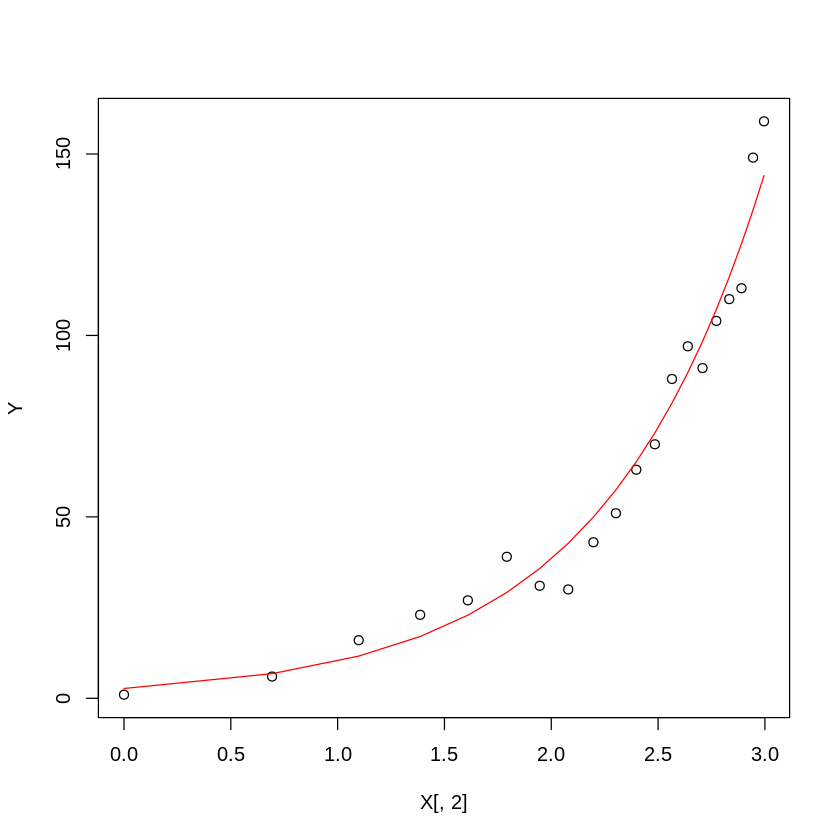

In [45]:
plot(X[,2],Y)
lines(X[,2], model$fitted.values, col = 'red', type = 'l')

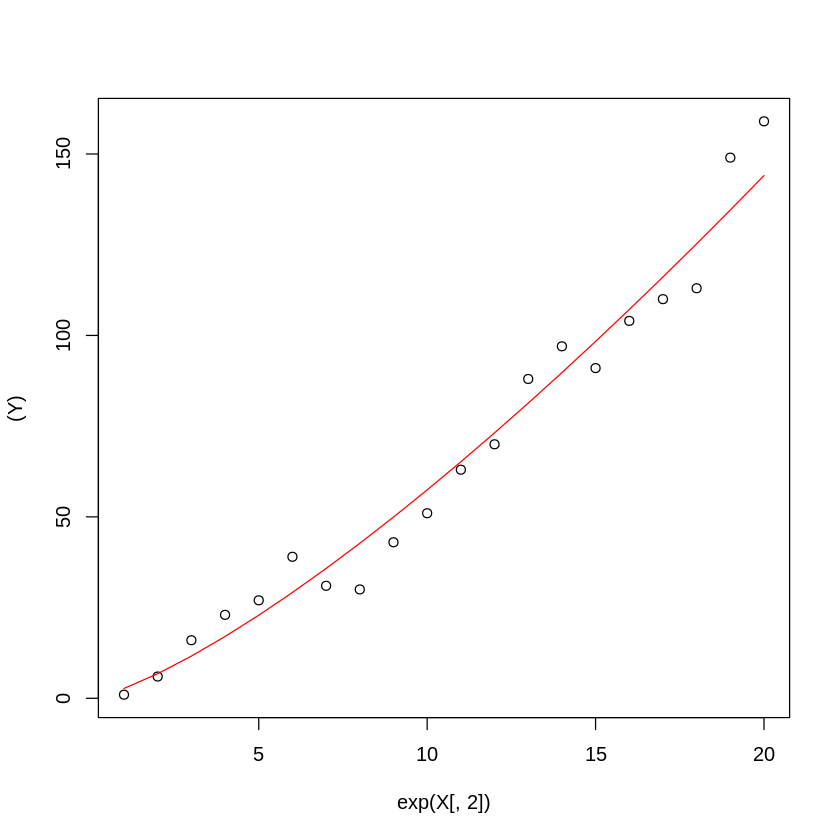

In [46]:
plot(exp(X[,2]),(Y))
lines(exp(X[,2]), model$fitted.values, col = 'red', type = 'l')

## Another Solutuion with strange convergence

Estimate $W^{-1}(\beta)$

$$W^{-1}(\beta) = diag(\frac{1}{V[Y_i]g'(\mu_i)^2)} = diag(\frac{\lambda_i^2}{\lambda_i}) = diag(e^{\beta_0 + \beta_1 x_i })$$


In [48]:
# function to calcualate weights
calc2_W_inv <- function(X,beta){
  n = length(X[,1])
  W = diag(c(exp(X%*%beta)),n,n)
  return(W)
}

Estimate $Z_i(\beta)$

$$Z_i(\beta) = X \beta + diag(g'(\mu_i))(y-\mu) = X \beta + \frac{y -e^{\beta_0 + \beta_1 x_i}}{e^{\beta_0 + \beta_1 x_i}}$$


In [49]:
# function to calcualate weights
calc2_Z <- function(X,Y,beta){
  Z = X%*%(beta) + (Y-exp(X%*%beta))/exp(X%*%beta)
  return(Z)
 }

In [50]:
Y <- aids$cases
n <- length(Y) 
X <- cbind(rep(1,n), log(seq(1,n,1)))
#cbind(Y,X)

In [51]:
### Initial values ###
beta_init      <- lm(log(Y)~ -1+ X)$coeff
dim(beta_init) <- c(2,1) # column vector
#print(beta_init)

Z_1<- calc2_Z(X,Y,beta_init)
#print(z_1)

# Compute Weight matrix
W_1 <- calc2_W_inv(X,beta_init)
#diag(W_1)

In [52]:
# Step from beta_0 to beta_1 and 
beta_1 = solve(t(X)%*%W_1%*%X, t(X)%*%W_1%*%Z_1)
beta_1
# variance-covariance matrix for estamtes beta_1
W_2 = calc2_W_inv(X,beta_1)
solve((t(X)%*%W_2%*%X))

1.007624
1.322786


0.02864799,-0.01076709
-0.01076709,0.00415721


In [53]:
# IWLS for example 2
IWLS_2 <- function(X,Y,beta_init,maxiter,epsilon){
  # Fisher-scoring algorithm
  i <- 1     # first iteration
  convergence <- F
  beta_all <- matrix(NA, nrow=maxiter, ncol=length(beta_init))
  beta_all[1,] <- t(beta_init)
  beta_i <- beta_init

  while (convergence == F & i <= maxiter){
    W = calc2_W_inv(X,beta_i)
    Z = calc2_Z(X,Y,beta_i)
    beta_i = solve(t(X)%*%W%*%X, t(X)%*%W%*%Z)
    #print(i)
    #print(t(X)%*%W%*%X)
    #print(t(beta_i))
    diff   <- max(abs(t(beta_i) - beta_all[i,]))
    #print(diff)
    if (diff>=epsilon){
      i <- i+1
      beta_all[i,] <- t(beta_i)
    }
    else
      convergence <- T
    }
  return(data.frame(beta_all) %>% na.omit)
}

In [54]:
# Initialization
maxiter = 100
epsilon = 10^(-8)

# Estimation of betas
betas <- IWLS_2(X,Y,beta_init,maxiter,epsilon)
names(betas) <-c("beta0","beta1")
betas

,beta0,beta1
,<dbl>,<dbl>
1,0.6858337,1.454341
2,1.0076238,1.322786
3,0.9960335,1.326597
4,0.9959980,1.326610


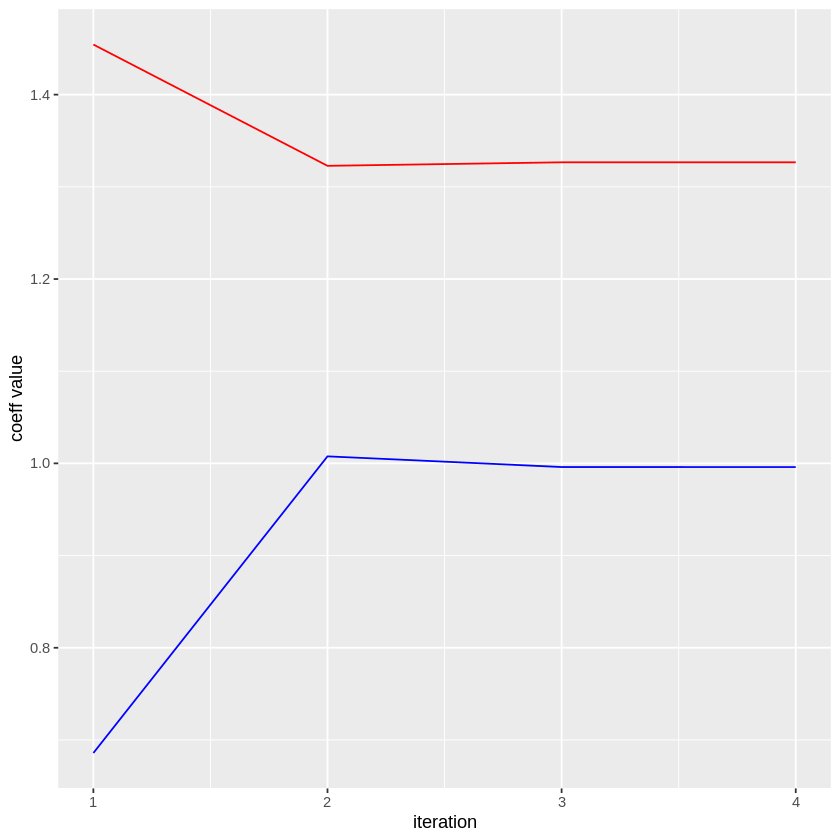

In [55]:
betas <- betas %>% mutate(iteration = c(1:dim(betas)[1]))
p = ggplot() + 
  geom_line(data = betas, aes(x = iteration, y = beta0), color = "blue") +
  geom_line(data = betas, aes(x = iteration, y = beta1), color = "red") +
  xlab('iteration') +
  ylab('coeff value')
print(p)

In [56]:
# Use beta_init = c(1,1)
betas <- IWLS_2(X,Y,c(0.1,0.1),maxiter,epsilon)
names(betas) <-c("beta0","beta1")
betas

,beta0,beta1
,<dbl>,<dbl>
1,0.10000,0.10000
2,-28.26912,34.65547
3,-29.26912,34.65547
4,-30.26912,34.65547
5,-31.26912,34.65547
6,-32.26912,34.65547
7,-33.26912,34.65547
8,-34.26912,34.65547
9,-35.26912,34.65547


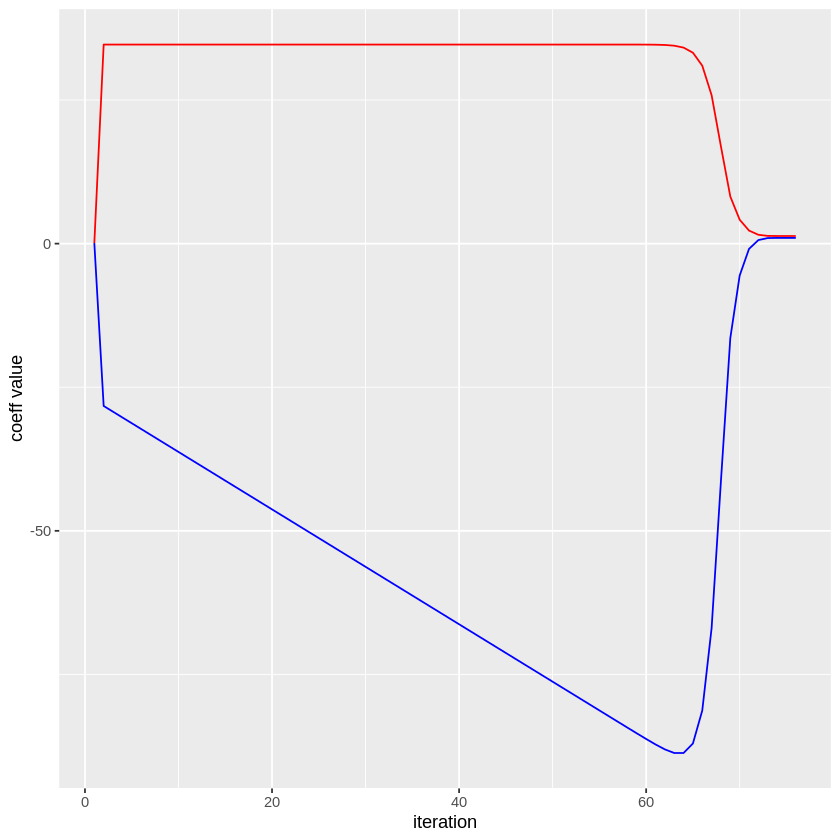

In [57]:
betas <- betas %>% mutate(iteration = c(1:dim(betas)[1]))
p = ggplot() + 
  geom_line(data = betas, aes(x = iteration, y = beta0), color = "blue") +
  geom_line(data = betas, aes(x = iteration, y = beta1), color = "red") +
  xlab('iteration') +
  ylab('coeff value')
print(p)

## Apendix: Solution by TH from the lecture



Direct computation of $U(\beta)$ and $I(\beta)$

In [ ]:
# TH solution from the lecture
FishScor2 <- function(x,Y,b){
  result <- list(FM=NA, SV=NA)
  pom <- exp(b[2]*x)
  
  a11 <- exp(b[1])*sum(pom)
  a12 <- exp(b[1])*sum(x*pom)
  a22 <- exp(b[1])*sum(x^2*pom)
  
  # Information matrix
  result$FM <- matrix(data=c(a11,a12,a12,a22), nrow = 2)
  
  # Score vector
  u1 <- sum(Y) - exp(b[1])*sum(pom)
  u2 <- sum(x*Y) - exp(b[1])*sum(x*pom)
  
  result$SV <- matrix(data=c(u1,u2), nrow = 2)
  return(result)
}


In [ ]:
# Initialization
X2 <- seq(1,20,1)
Y2 <- c(1, 6, 16, 23, 27, 39, 31, 30, 43, 51, 63, 70, 88, 97, 91, 104, 110, 113, 149, 159)
maxiter <- 20         # maximalni pocet iteraci
epsilon <- 10^(-6)    # presnost

i <- 1     # aktualni iterace
beta <- matrix(0,2,maxiter)
beta[,1] <- beta_init
convergence <- F

# Fisher-scoring algoritmus
while (convergence == F & i <= maxiter){
  FS <- FishScor2(log(X2),Y2,beta[,i])
  # print(FS$FM) # Information matrix
  
  beta[,i+1] <- beta[,i] + solve(FS$FM)%*%FS$SV
  
  diff <- (abs(beta[,i+1] - beta[,i]))
  if (any(diff>=epsilon)){
    i <- i+1
  }
  else
    convergence <- TRUE
}
beta.est <- beta[,i] 
beta.est


[1] 0.995998 1.326610


Call:
glm(formula = Y2 ~ log(X2), family = poisson(link = "log"))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0568  -0.8302  -0.3072   0.9279   1.7310  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.99600    0.16971   5.869 4.39e-09 ***
log(X2)      1.32661    0.06463  20.525  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 677.264  on 19  degrees of freedom
Residual deviance:  21.755  on 18  degrees of freedom
AIC: 138.05

Number of Fisher Scoring iterations: 4


(Intercept)     log(X2) 
   0.995998    1.326610

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“unimplemented pch value '26'”


null device 
          1

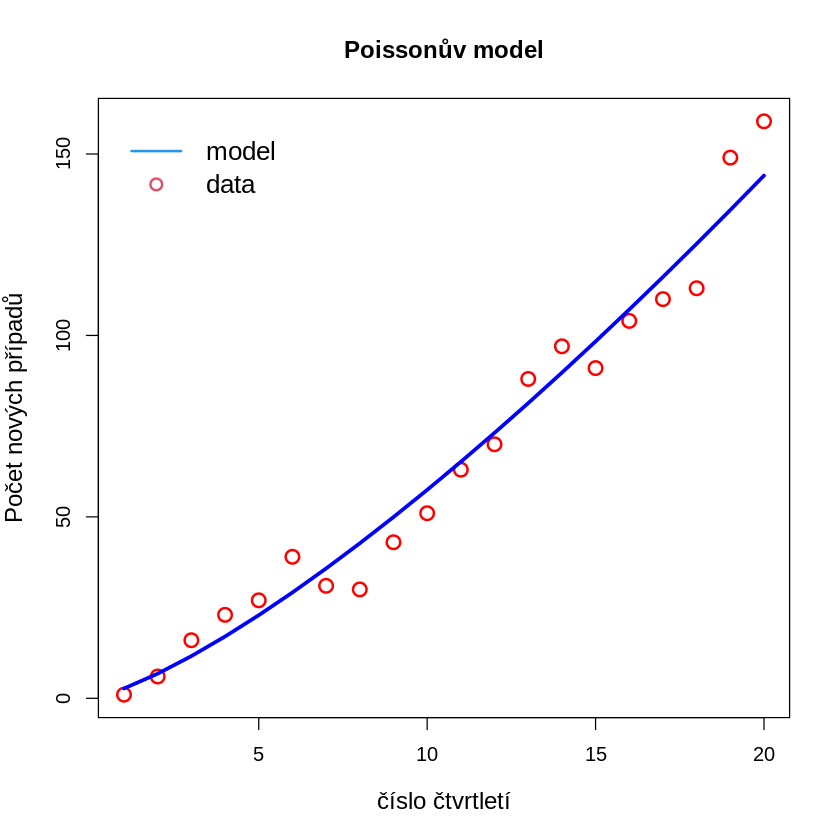

In [ ]:
#############################################
## Use glm() function: Built-in function from R

model <- glm(formula=Y2~log(X2),family=poisson(link = "log"))
summary(model) # souhrn modelu
beta.e <- coefficients(model); beta.e  # odhadnute parametry
y.hat  <- model$fitted.values

#############################################
## Plot data and estimation
plot(X2,Y, col="red", cex=1.5, lwd=2, 
      main="Poissonův model",
      xlab="číslo čtvrtletí",
      ylab="Počet nových případů",
      cex.lab=1.2)
lines(y.hat, col="blue", type = "l", lwd=3)
text <- c("model", "data")
legend(x=1, y=160, text, col = c(4,2), bty="n", lwd = 2, pch=c(26,1), cex=1.3, lty=c(1,0))
dev.off()


Logistic regression and IWLS

http://www.jtrive.com/estimating-logistic-regression-coefficents-from-scratch-r-version.html